In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycatch22

from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

Loading data from all subjects...
Combined data shape: (1675, 51)
ROI one-hot encoding completed.
Using explicit feature list with 118 features.
Total unique subjects: 23
Training subjects: ['sub-RID0179' 'sub-RID0032' 'sub-RID0238' 'sub-RID0064' 'sub-RID0033'
 'sub-RID0175' 'sub-RID0562' 'sub-RID0050' 'sub-RID0051' 'sub-RID0424'
 'sub-RID0381' 'sub-RID0589' 'sub-RID0658' 'sub-RID0101' 'sub-RID0167'
 'sub-RID0301' 'sub-RID0508' 'sub-RID0089']
Testing subjects: ['sub-RID0320' 'sub-RID0143' 'sub-RID0031' 'sub-RID0117' 'sub-RID0405']
Training set shape: (1251, 118)
Test set shape: (424, 118)

Training Model: RANDOM_FOREST

=== RANDOM_FOREST GROUP-CV Results ===
Accuracy: 0.857 ± 0.054
ROC AUC: 0.579 ± 0.127

--- RANDOM_FOREST TEST SET PERFORMANCE ---
Accuracy: 0.8349056603773585
ROC AUC: 0.6467701392490922

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       353
           1       1.00      0.01      0.03        7

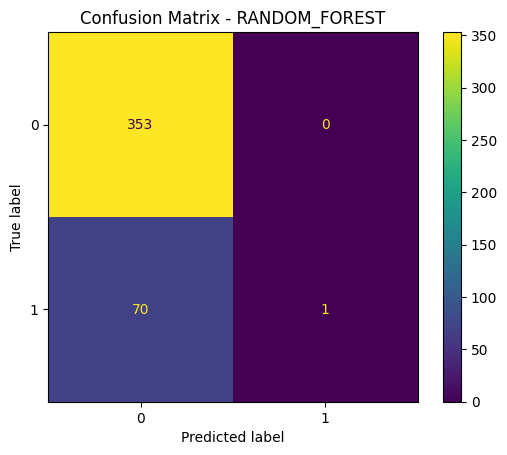


Training Model: LOGISTIC

=== LOGISTIC GROUP-CV Results ===
Accuracy: 0.772 ± 0.023
ROC AUC: 0.650 ± 0.103

--- LOGISTIC TEST SET PERFORMANCE ---
Accuracy: 0.7240566037735849
ROC AUC: 0.7309579858755935

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       353
           1       0.30      0.48      0.37        71

    accuracy                           0.72       424
   macro avg       0.59      0.63      0.60       424
weighted avg       0.78      0.72      0.75       424



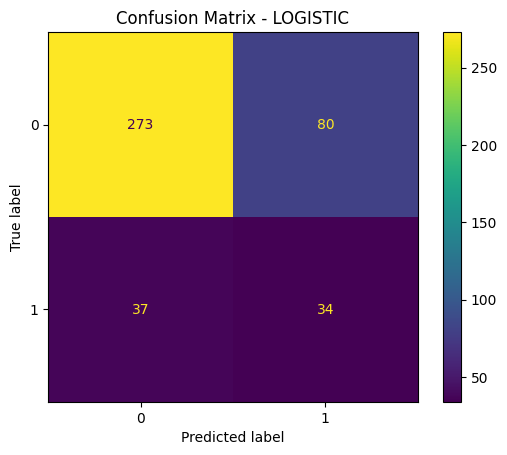


Training Model: SVM

=== SVM GROUP-CV Results ===
Accuracy: 0.771 ± 0.033
ROC AUC: 0.607 ± 0.116

--- SVM TEST SET PERFORMANCE ---
Accuracy: 0.7169811320754716
ROC AUC: 0.6938913936879065

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       353
           1       0.27      0.39      0.32        71

    accuracy                           0.72       424
   macro avg       0.57      0.59      0.57       424
weighted avg       0.76      0.72      0.74       424



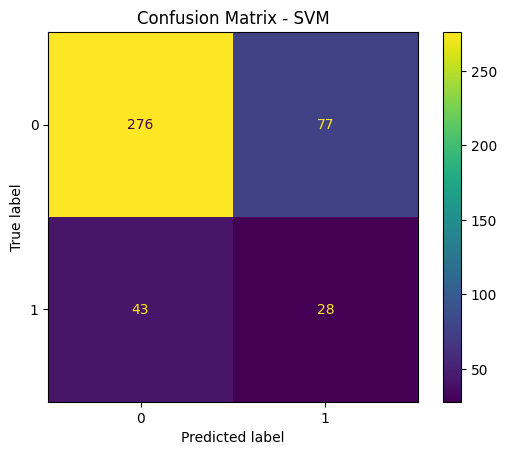


Training Model: XGBOOST


/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:02:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:02:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:02:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:02:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } ar


=== XGBOOST GROUP-CV Results ===
Accuracy: 0.834 ± 0.051
ROC AUC: 0.614 ± 0.091


/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:02:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBOOST TEST SET PERFORMANCE ---
Accuracy: 0.8042452830188679
ROC AUC: 0.5937038662570323

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       353
           1       0.32      0.15      0.21        71

    accuracy                           0.80       424
   macro avg       0.58      0.54      0.55       424
weighted avg       0.76      0.80      0.77       424



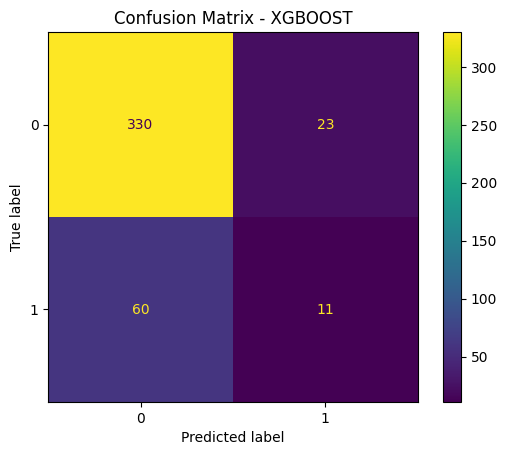


=== FEATURE IMPORTANCE ASSESSMENT ===


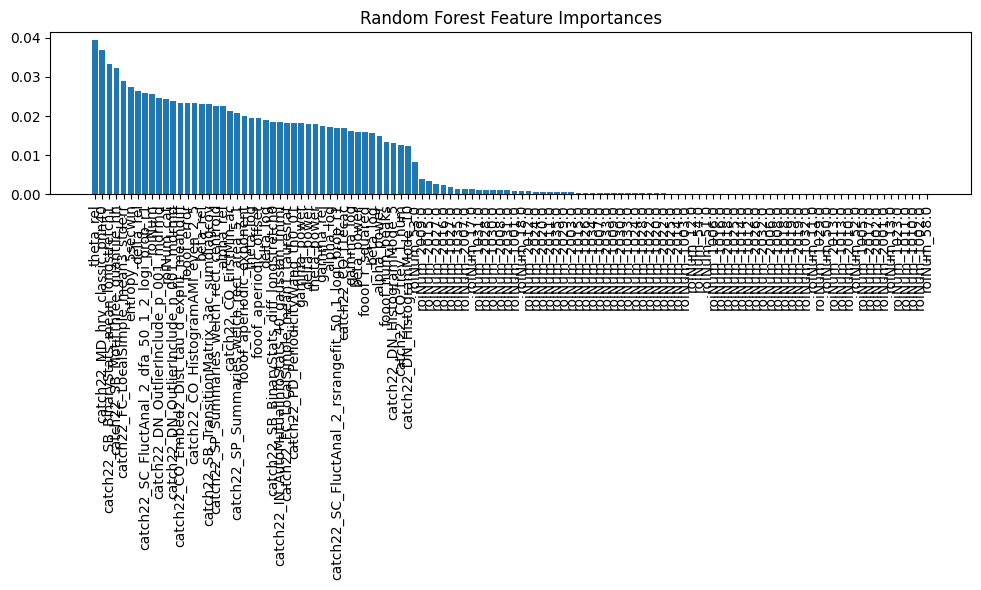

Top 10 Random Forest Features:
1. theta_rel (importance=0.0394)
2. catch22_MD_hrv_classic_pnn40 (importance=0.0368)
3. catch22_SB_BinaryStats_mean_longstretch1 (importance=0.0334)
4. catch22_SB_MotifThree_quantile_hh (importance=0.0324)
5. catch22_FC_LocalSimple_mean3_stderr (importance=0.0288)
6. entropy_5secwin (importance=0.0275)
7. delta_rel (importance=0.0265)
8. catch22_SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1 (importance=0.0260)
9. roiNum (importance=0.0256)
10. catch22_DN_OutlierInclude_p_001_mdrmd (importance=0.0245)

Permutation Importance for Logistic Regression (Test Set):


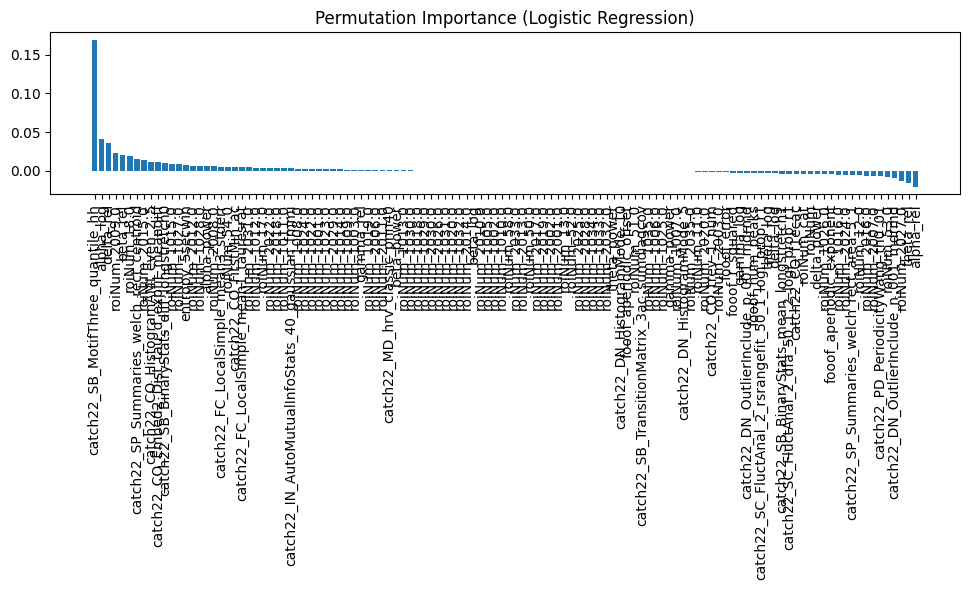

In [3]:
# %% [code]
"""
Pipeline with ROI as an Explicit Feature

Steps:
1. Load aggregated data from all subjects.
2. One-hot encode the ROI information (from 'roiNum').
3. Define an explicit feature list that includes:
   - Bandpower features (delta, theta, alpha, beta, gamma: power, rel, log)
   - FOOOF measures
   - Entropy
   - catch22 features
   - ROI one-hot encoded columns
4. Split data at the subject level.
5. Standardize features.
6. Train models using group-aware cross-validation.
7. Evaluate and display performance metrics and confusion matrices.
"""

##################################
# 1) DATA LOADING & MERGING
##################################

def convert_spared_to_label(val):
    """Convert 'spared' to binary: 0 if spared, 1 if resected."""
    if isinstance(val, bool):
        return 0 if val else 1
    elif isinstance(val, str):
        return 0 if val.strip().upper() == 'TRUE' else 1
    else:
        return 0 if bool(val) else 1

def load_all_subjects(subjects_dir, subject_list):
    """
    Loads each subject's aggregated pickle file (e.g. sub-RIDXXXX_features_averaged.pkl),
    adds a 'subject_id' column, converts 'spared' to a binary label, and concatenates all data.
    """
    all_dfs = []
    for subj in subject_list:
        subj_path = os.path.join(subjects_dir, subj)
        pkl_file = os.path.join(subj_path, f"{subj}_features_averaged.pkl")
        if not os.path.isfile(pkl_file):
            print(f"Warning: file not found: {pkl_file}")
            continue
        df = pd.read_pickle(pkl_file)
        df['subject_id'] = subj
        if 'spared' not in df.columns:
            raise ValueError(f"'spared' column missing for {subj}")
        df['label'] = df['spared'].apply(convert_spared_to_label)
        all_dfs.append(df)
    if not all_dfs:
        raise ValueError("No data loaded. Check paths or subject list.")
    combined_df = pd.concat(all_dfs, axis=0, ignore_index=True)
    return combined_df

# Define the directory and subject list 
subjects_dir = "/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/hup/derivatives/clean"
subject_list = [
    "sub-RID0031", "sub-RID0032", "sub-RID0033", "sub-RID0050", "sub-RID0051", 
    "sub-RID0064", "sub-RID0089", "sub-RID0101", "sub-RID0117", "sub-RID0143",
    "sub-RID0167", "sub-RID0175", "sub-RID0179", "sub-RID0238", "sub-RID0301",
    "sub-RID0320", "sub-RID0381", "sub-RID0405", "sub-RID0424", "sub-RID0508",
    "sub-RID0562", "sub-RID0589", "sub-RID0658"
]

print("Loading data from all subjects...")
combined_df = load_all_subjects(subjects_dir, subject_list)
print(f"Combined data shape: {combined_df.shape}")

##################################
# 2) INCLUDE ROI AS A FEATURE
##################################
# =combined_df has a column 'roiNum' (a float/decimal identifier).
# Convert 'roiNum' to a string (categorical) and one-hot encode it.
# combined_df['roiNum_cat'] = combined_df['roiNum'].astype(str)
# roi_dummies = pd.get_dummies(combined_df['roiNum_cat'], prefix='roi')
# combined_df = pd.concat([combined_df, roi_dummies], axis=1)
combined_df['roiNum_cat'] = combined_df['roiNum'].astype(str)
roi_dummies = pd.get_dummies(combined_df['roiNum_cat'], prefix='roiNum')
combined_df = pd.concat([combined_df, roi_dummies], axis=1)
print("ROI one-hot encoding completed.")
# Now, the one-hot encoded columns start with 'roi_'

##################################
# 3) DEFINE EXPLICIT FEATURE LIST
##################################
def get_explicit_feature_list():
    # Bandpower features: 5 bands x 3 metrics = 15 features
    band_names = ['delta', 'theta', 'alpha', 'beta', 'gamma']
    band_features = [f"{band}_{metric}" for band in band_names for metric in ['power', 'rel', 'log']]
    
    # FOOOF features: 5 features
    fooof_features = [
        'fooof_aperiodic_offset', 
        'fooof_aperiodic_exponent', 
        'fooof_r_squared', 
        'fooof_error', 
        'fooof_num_peaks'
    ]
    
    # Entropy feature: 1
    entropy_features = ['entropy_5secwin']
    
    # catch22 features: 
    dummy = np.random.randn(100).tolist()
    res = pycatch22.catch22_all(dummy, catch24=False)
    catch22_features = [f"catch22_{nm}" for nm in res['names']]
    
    # ROI one-hot encoded features: all columns starting with 'roiNum'
    # roi_features = [col for col in combined_df.columns if col.startswith("roi_")]
    roi_features = [col for col in combined_df.columns if col.startswith("roiNum")]
    
    return band_features + fooof_features + entropy_features + catch22_features + roi_features

explicit_feature_list = get_explicit_feature_list()
# Only include features present in combined_df:
present_features = [feat for feat in explicit_feature_list if feat in combined_df.columns]
print(f"Using explicit feature list with {len(present_features)} features.")

##################################
# 4) PREPROCESSING
##################################
# Drop rows with missing values in the explicit feature columns.
combined_df = combined_df.dropna(subset=present_features)
# Build predictor and label matrices
X_full = combined_df[present_features].values
y_full = combined_df['label'].values

##################################
# 5) TRAIN-TEST SPLIT AT SUBJECT LEVEL
##################################
unique_subjects = combined_df['subject_id'].unique()
print("Total unique subjects:", len(unique_subjects))
from sklearn.model_selection import train_test_split
train_subjects, test_subjects = train_test_split(unique_subjects, test_size=0.2, random_state=42)
print("Training subjects:", train_subjects)
print("Testing subjects:", test_subjects)

train_mask = combined_df['subject_id'].isin(train_subjects)
test_mask = combined_df['subject_id'].isin(test_subjects)

X_train = combined_df[train_mask][present_features].values
y_train = combined_df[train_mask]['label'].values
X_test = combined_df[test_mask][present_features].values
y_test = combined_df[test_mask]['label'].values

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Standardize features based on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##################################
# 6) TRAIN MODELS USING GROUP-AWARE CROSS-VALIDATION
##################################
from sklearn.model_selection import GroupKFold

def train_and_evaluate_with_groups(X, y, groups, model_choice='random_forest'):
    if model_choice == 'random_forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    elif model_choice == 'logistic':
        model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    elif model_choice == 'svm':
        model = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')
    elif model_choice == 'xgboost':
        pos = np.sum(y == 1)
        neg = np.sum(y == 0)
        scale_pos_weight = neg / pos if pos > 0 else 1
        model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, 
                              use_label_encoder=False, eval_metric='logloss')
    else:
        raise ValueError("model_choice must be one of ['random_forest','logistic','svm','xgboost']")
    
    gkf = GroupKFold(n_splits=5)
    accuracies, aucs = [], []
    for train_idx, val_idx in gkf.split(X, y, groups=groups):
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y[train_idx], y[val_idx]
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)
        acc = accuracy_score(y_val_cv, y_pred_cv)
        accuracies.append(acc)
        if hasattr(model, 'predict_proba'):
            y_proba_cv = model.predict_proba(X_val_cv)[:, 1]
            aucs.append(roc_auc_score(y_val_cv, y_proba_cv))
    print(f"\n=== {model_choice.upper()} GROUP-CV Results ===")
    print(f"Accuracy: {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")
    if aucs:
        print(f"ROC AUC: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")
    
    # Refit on full training set
    model.fit(X, y)
    return model

# Create the group vector from training data (subject IDs)
train_groups = combined_df[train_mask]['subject_id'].values

# Define the models to run
models_to_run = ['random_forest', 'logistic', 'svm', 'xgboost']
trained_models = {}

for model_name in models_to_run:
    print("\n=======================================")
    print(f"Training Model: {model_name.upper()}")
    clf = train_and_evaluate_with_groups(X_train_scaled, y_train, groups=train_groups, model_choice=model_name)
    
    # Evaluate on test set
    y_pred_test = clf.predict(X_test_scaled)
    print(f"\n--- {model_name.upper()} TEST SET PERFORMANCE ---")
    print("Accuracy:", accuracy_score(y_test, y_pred_test))
    if hasattr(clf, 'predict_proba'):
        y_proba_test = clf.predict_proba(X_test_scaled)[:, 1]
        print("ROC AUC:", roc_auc_score(y_test, y_proba_test))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format='d')
    plt.title(f"Confusion Matrix - {model_name.upper()}")
    plt.show()
    
    trained_models[model_name] = clf

##################################
# 7) FEATURE IMPORTANCE ASSESSMENT
##################################
print("\n=== FEATURE IMPORTANCE ASSESSMENT ===")

# For Random Forest: built-in importance
rf_model = trained_models.get('random_forest')
if rf_model is not None and hasattr(rf_model, 'feature_importances_'):
    importances = rf_model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = [present_features[i] for i in sorted_idx]
    plt.figure(figsize=(10,6))
    plt.bar(range(len(importances)), importances[sorted_idx], align='center')
    plt.xticks(range(len(importances)), sorted_features, rotation=90)
    plt.title("Random Forest Feature Importances")
    plt.tight_layout()
    plt.show()
    print("Top 10 Random Forest Features:")
    for i in range(min(10, len(sorted_features))):
        print(f"{i+1}. {sorted_features[i]} (importance={importances[sorted_idx][i]:.4f})")
    
# Permutation importance for Logistic Regression
lr_model = trained_models.get('logistic')
if lr_model is not None:
    print("\nPermutation Importance for Logistic Regression (Test Set):")
    result = permutation_importance(
        lr_model, X_test_scaled, y_test, n_repeats=20, random_state=42, scoring='roc_auc'
    )
    perm_importances = result.importances_mean
    sorted_idx = np.argsort(perm_importances)[::-1]
    sorted_features = [present_features[i] for i in sorted_idx]
    plt.figure(figsize=(10,6))
    plt.bar(range(len(perm_importances)), perm_importances[sorted_idx], align='center')
    plt.xticks(range(len(perm_importances)), sorted_features, rotation=90)
    plt.title("Permutation Importance (Logistic Regression)")
    plt.tight_layout()
    plt.show()

In [5]:
# %% [code]
print("=== Summary of All Model Results on Test Set ===")

for model_name in models_to_run:
    print("\n------------------------------")
    print(f"Model: {model_name.upper()}")
    
    model = trained_models[model_name]
    y_pred = model.predict(X_test_scaled)
    
    # Compute ROC AUC if available
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = "N/A"
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.3f}")
    print(f"ROC AUC: {roc_auc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)


=== Summary of All Model Results on Test Set ===

------------------------------
Model: RANDOM_FOREST
Accuracy: 0.835
ROC AUC: 0.6467701392490922
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       353
           1       1.00      0.01      0.03        71

    accuracy                           0.83       424
   macro avg       0.92      0.51      0.47       424
weighted avg       0.86      0.83      0.76       424

Confusion Matrix:
[[353   0]
 [ 70   1]]

------------------------------
Model: LOGISTIC
Accuracy: 0.724
ROC AUC: 0.7309579858755935
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       353
           1       0.30      0.48      0.37        71

    accuracy                           0.72       424
   macro avg       0.59      0.63      0.60       424
weighted avg       0.78      0.72      0.75       424

Confusion Matrix:
[[2

In [7]:
# %% [code]
# Print overall statistics by ROI
overall_counts = combined_df.groupby('roiNum')['label'].value_counts().unstack(fill_value=0)
# Rename columns assuming 0 is Spared and 1 is Resected
overall_counts.columns = ['Spared', 'Resected']
print("Overall counts by ROI:")
print(overall_counts)

# Print statistics by ROI for each subject
subject_roi_counts = combined_df.groupby(['subject_id', 'roiNum'])['label'].value_counts().unstack(fill_value=0)
subject_roi_counts.columns = ['Spared', 'Resected']
print("\nCounts by ROI for each subject:")
print(subject_roi_counts)


Overall counts by ROI:
        Spared  Resected
roiNum                  
11.0         3         0
12.0        11         1
13.0         3         0
17.0        53        22
18.0        13        12
...        ...       ...
2030.0      19         5
2031.0      34         0
2032.0       1         0
2033.0       0         3
2035.0      23         2

[73 rows x 2 columns]

Counts by ROI for each subject:
                    Spared  Resected
subject_id  roiNum                  
sub-RID0031 12.0         6         0
            17.0         4         0
            18.0         2         0
            53.0         2         5
            54.0         0         2
...                    ...       ...
sub-RID0658 2024.0       6         0
            2027.0       2         0
            2028.0       3         0
            2031.0       2         0
            2035.0       2         0

[469 rows x 2 columns]


Hyperparameter tuning

In [8]:
# %% [code]
from sklearn.model_selection import GridSearchCV, GroupKFold

# Define parameter grids for each model
param_grids = {
    'random_forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'logistic': {
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'svm': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    },
    'xgboost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.5, 0.7, 1.0]
    }
}

# Create a dictionary to store the best tuned models
tuned_models = {}

# Use GroupKFold to ensure subject-level splitting during CV
gkf = GroupKFold(n_splits=5)

for model_name in models_to_run:
    print(f"\nTuning hyperparameters for {model_name.upper()}")
    if model_name == 'random_forest':
        model = RandomForestClassifier(random_state=42, class_weight='balanced')
    elif model_name == 'logistic':
        model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    elif model_name == 'svm':
        model = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')
    elif model_name == 'xgboost':
        # Compute scale_pos_weight for imbalance handling
        pos = np.sum(y_train == 1)
        neg = np.sum(y_train == 0)
        scale_pos_weight = neg / pos if pos > 0 else 1
        model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight,
                              use_label_encoder=False, eval_metric='logloss')
    else:
        continue

    grid = GridSearchCV(estimator=model,
                        param_grid=param_grids[model_name],
                        scoring='roc_auc',
                        cv=gkf,
                        n_jobs=-1,
                        refit=True)
    
    # Fit using subject-level groups (train_groups was defined in the train-test split cell)
    grid.fit(X_train_scaled, y_train, groups=train_groups)
    
    print("Best parameters:", grid.best_params_)
    print("Best CV ROC AUC:", grid.best_score_)
    tuned_models[model_name] = grid.best_estimator_



Tuning hyperparameters for RANDOM_FOREST
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best CV ROC AUC: 0.6222956650984793

Tuning hyperparameters for LOGISTIC
Best parameters: {'C': 100}
Best CV ROC AUC: 0.678686420682974

Tuning hyperparameters for SVM
Best parameters: {'C': 0.1, 'gamma': 0.001}
Best CV ROC AUC: 0.6450114151660609

Tuning hyperparameters for XGBOOST


/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } ar

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
Best CV ROC AUC: 0.6552509074855604

=== Evaluation of Tuned Models on Test Set ===

------------------------------
Model: RANDOM_FOREST
Accuracy: 0.830
ROC AUC: 0.6479471731237283
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       353
           1       0.33      0.01      0.03        71

    accuracy                           0.83       424
   macro avg       0.58      0.50      0.47       424
weighted avg       0.75      0.83      0.76       424

Confusion Matrix:
[[351   2]
 [ 70   1]]

------------------------------
Model: LOGISTIC
Accuracy: 0.717
ROC AUC: 0.7290029126600965
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       353
           1       0.27      0.39      0.32        71

    accuracy                           0.72       424


In [9]:
# Evaluate the tuned models on the test set
print("\n=== Evaluation of Tuned Models on Test Set ===")
for model_name, model in tuned_models.items():
    print(f"\n------------------------------\nModel: {model_name.upper()}")
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = "N/A"
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"ROC AUC: {roc_auc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)



=== Evaluation of Tuned Models on Test Set ===

------------------------------
Model: RANDOM_FOREST
Accuracy: 0.830
ROC AUC: 0.6479471731237283
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       353
           1       0.33      0.01      0.03        71

    accuracy                           0.83       424
   macro avg       0.58      0.50      0.47       424
weighted avg       0.75      0.83      0.76       424

Confusion Matrix:
[[351   2]
 [ 70   1]]

------------------------------
Model: LOGISTIC
Accuracy: 0.717
ROC AUC: 0.7290029126600965
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       353
           1       0.27      0.39      0.32        71

    accuracy                           0.72       424
   macro avg       0.57      0.59      0.57       424
weighted avg       0.76      0.72      0.74       424

Confusion Matrix:
[[27